# Köningsberg Problem

Check the degrees of the vertices:
If all vertices have an even degree, the figure has an Eulerian Circuit and can be drawn without lifting the pencil, returning to the start.

If exactly two vertices have an odd degree, the figure has an Eulerian Path, so it can still be drawn without lifting the pencil but won't necessarily return to the starting point. 

If more than two vertices have an odd degree, it is not possible to draw the figure without lifting the pencil or retracing lines.

# Graph representation 
### 2.3

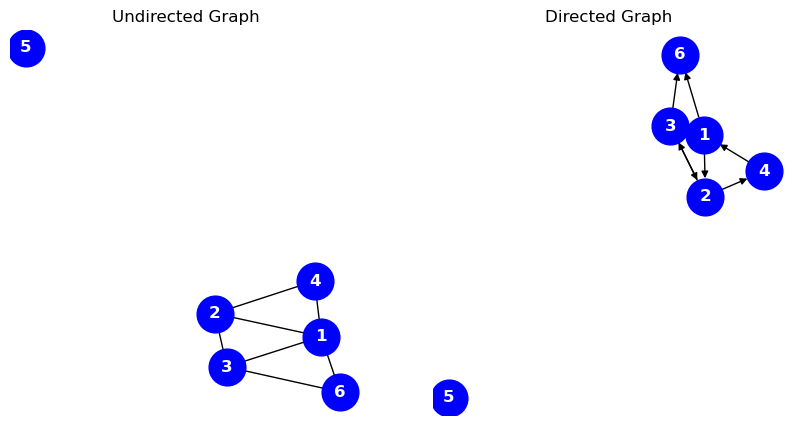

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
# Edge list for the undirected graph (a)
edges_undirected = [(1, 2), (1, 3), (1, 6), (1,4), (2, 3), (2, 4), (3, 6)]

# Create an undirected graph
G_undirected = nx.Graph()
G_undirected.add_edges_from(edges_undirected)
#add node 5
G_undirected.add_node(5)


# Edge list for the directed graph (b)
edges_directed = [(1, 2), (1, 6), (3,6), (3, 1), (3,2), (2,3), (2, 4), (4,1)]

# Create a directed graph
G_directed = nx.DiGraph()
G_directed.add_edges_from(edges_directed)
#add node 5
G_directed.add_node(5)

# Plot the undirected graph (a)
plt.figure(figsize=(10, 5))
plt.subplot(121)
nx.draw(G_undirected, with_labels=True, node_color='blue', font_weight='bold', node_size=700, font_color='white')
plt.title("Undirected Graph")

# Plot the directed graph (b)
plt.subplot(122)
nx.draw(G_directed, with_labels=True, node_color='blue', font_weight='bold', node_size=700, font_color='white', arrows=True)
plt.title("Directed Graph")

# Display both graphs
plt.show()

### The corresponding adjacency matrices.
### The corresponding link lists.

In [23]:

#make the adjacency matrix for the undirected graph
adj_matrix_undirected = nx.adjacency_matrix(G_undirected).todense()
print("Adjacency Matrix for the Undirected Graph:")
print(adj_matrix_undirected)
#make the adjacency matrix for the directed graph
adj_matrix_directed = nx.adjacency_matrix(G_directed).todense()
print("Adjacency Matrix for the Directed Graph:")
print(adj_matrix_directed)
#make the link list for the undirected graph
link_list_undirected = nx.generate_edgelist(G_undirected)
print("Link List for the Undirected Graph:")
print(list(link_list_undirected))
#make the link list for the directed graph
link_list_directed = nx.generate_edgelist(G_directed)
print("Link List for the Directed Graph:")
print(list(link_list_directed))

Adjacency Matrix for the Undirected Graph:
[[0 1 1 1 1]
 [1 0 1 0 1]
 [1 1 0 1 0]
 [1 0 1 0 0]
 [1 1 0 0 0]]
Adjacency Matrix for the Directed Graph:
[[0 1 1 0 0]
 [0 0 0 1 1]
 [0 0 0 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]]
Link List for the Undirected Graph:
['1 2 {}', '1 3 {}', '1 6 {}', '1 4 {}', '2 3 {}', '2 4 {}', '3 6 {}']
Link List for the Directed Graph:
['1 2 {}', '1 6 {}', '2 3 {}', '2 4 {}', '3 6 {}', '3 1 {}', '3 2 {}', '4 1 {}']


Determine the average clustering coefficient of the network shown in

In [24]:
# Determine the average clustering coefficient of the network 
average_clustering_coefficient = nx.average_clustering(G_undirected)
print("Average Clustering Coefficient of the Undirected Graph:", average_clustering_coefficient)



Average Clustering Coefficient of the Undirected Graph: 0.7666666666666666


If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?


# Biparte networks


Adjacency Matrix:
[[0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


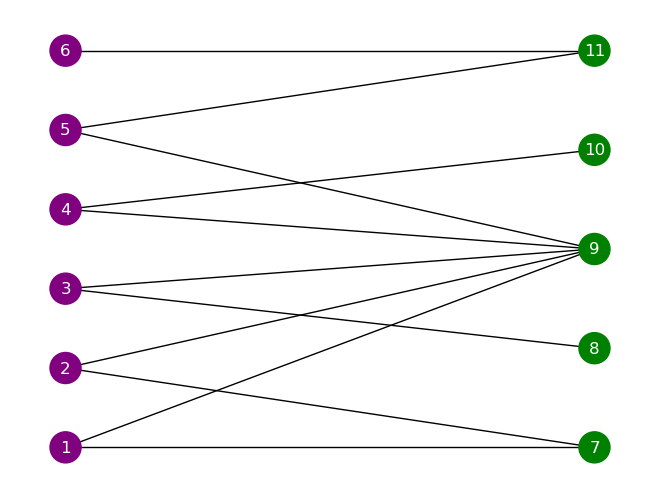

In [29]:
import numpy as np

# Create the bipartite graph
B = nx.Graph()

# Define the two sets of nodes (purple and green nodes)
purple_nodes = [1, 2, 3, 4, 5, 6]
green_nodes = [7, 8, 9, 10, 11]

# Add the nodes with the bipartite attribute (useful for visualization later)
B.add_nodes_from(purple_nodes, bipartite=0)  # Purple set
B.add_nodes_from(green_nodes, bipartite=1)   # Green set

# Add edges between purple and green nodes (as per the image)
edges = [(1, 7), (1, 9),
         (2, 7), (2, 9),
         (3, 8), (3, 9),
         (4, 9), (4, 10),
         (5, 9), (5, 11),
         (6, 11)]

B.add_edges_from(edges)

# Get the adjacency matrix (in NumPy array form)
adj_matrix = nx.to_numpy_array(B, nodelist=purple_nodes + green_nodes, dtype=int)

# Print the adjacency matrix
print("Adjacency Matrix:")
print(adj_matrix)

# Visualize the bipartite graph
pos = nx.bipartite_layout(B, purple_nodes)
nx.draw(B, pos, with_labels=True, node_color=['purple' if n in purple_nodes else 'green' for n in B.nodes()], node_size=500, font_color='white')
plt.show()



In [32]:
# Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.
purple_degrees = [degree for node, degree in B.degree(purple_nodes)]
green_degrees = [degree for node, degree in B.degree(green_nodes)]
# Calculate the average degree of the purple nodes
average_degree_purple = np.mean(purple_degrees)
# Calculate the average degree of the green nodes
average_degree_green = np.mean(green_degrees)
print("Average Degree of the Purple Nodes:", average_degree_purple)
print("Average Degree of the Green Nodes:", average_degree_green)

Average Degree of the Purple Nodes: 1.8333333333333333
Average Degree of the Green Nodes: 2.2


In [33]:
#Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?
# Project the bipartite graph onto the purple nodes
P = nx.bipartite.projected_graph(B, purple_nodes)
# Project the bipartite graph onto the green nodes
G = nx.bipartite.projected_graph(B, green_nodes)
# Calculate the average degree of the purple nodes in the projection
average_degree_purple_projection = np.mean([degree for node, degree in P.degree()])
# Calculate the average degree of the green nodes in the projection
average_degree_green_projection = np.mean([degree for node, degree in G.degree()])
print("Average Degree of the Purple Nodes in the Projection:", average_degree_purple_projection)
print("Average Degree of the Green Nodes in the Projection:", average_degree_green_projection)


Average Degree of the Purple Nodes in the Projection: 3.6666666666666665
Average Degree of the Green Nodes in the Projection: 1.6


# Bipartite Networks - General Considerations

## 1. Maximum Number of Links \( L_{\text{max}} \)

In a bipartite network, the two sets of nodes \( N_1 \) and \( N_2 \) only connect to each other. Links between nodes within the same set are not allowed (i.e., no edges exist between two nodes in \( N_1 \) or between two nodes in \( N_2 \)).

The maximum number of links \( L_{\text{max}} \) in the network occurs when every node in \( N_1 \) is connected to every node in \( N_2 \):

$$
L_{\text{max}} = N_1 \times N_2
$$

---

## 2. Number of Links That Cannot Occur Compared to a Non-Bipartite Network

In a non-bipartite network of size \( N = N_1 + N_2 \), the total number of possible links is given by:

$$
L_{\text{complete}} = \frac{N(N-1)}{2}
$$

where \( N = N_1 + N_2 \).

In the bipartite network, links are only allowed between nodes in \( N_1 \) and \( N_2 \), but **not within** \( N_1 \) or within \( N_2 \). The number of forbidden links (i.e., links that cannot occur) is the number of links that would connect nodes within the same set.

- Links within \( N_1 \): \( \frac{N_1(N_1 - 1)}{2} \)
- Links within \( N_2 \): \( \frac{N_2(N_2 - 1)}{2} \)

Thus, the total number of links that cannot occur is:

$$
L_{\text{forbidden}} = \frac{N_1(N_1 - 1)}{2} + \frac{N_2(N_2 - 1)}{2}
$$

---

## 3. Network Density \( \rho \)

Network density \( \rho \) is defined as the ratio of the actual number of links \( L \) to the maximum possible number of links \( L_{\text{max}} \):

$$
\rho = \frac{L}{L_{\text{max}}} = \frac{L}{N_1 \times N_2}
$$

If \( N_1 \ll N_2 \) (meaning \( N_1 \) is much smaller than \( N_2 \)), the density will generally be low because even if every node in \( N_1 \) is connected to all nodes in \( N_2 \), there are fewer potential links compared to a more balanced bipartite network.

---

## 4. Expression Connecting \( N_1 \), \( N_2 \), and the Average Degrees \( \langle k_1 \rangle \) and \( \langle k_2 \rangle \)

In a bipartite network:

- \( \langle k_1 \rangle \): the average number of links from a node in \( N_1 \) to nodes in \( N_2 \).
- \( \langle k_2 \rangle \): the average number of links from a node in \( N_2 \) to nodes in \( N_1 \).

The total number of links \( L \) in the bipartite network can be expressed in two ways:

- In terms of the degrees of nodes in \( N_1 \): 
  $$
  L = N_1 \langle k_1 \rangle
  $$

- In terms of the degrees of nodes in \( N_2 \): 
  $$
  L = N_2 \langle k_2 \rangle
  $$

Since these represent the same number of links, we can equate them:

$$
N_1 \langle k_1 \rangle = N_2 \langle k_2 \rangle
$$

This expression connects \( N_1 \), \( N_2 \), and the average degrees \( \langle k_1 \rangle \) and \( \langle k_2 \rangle \).


# Part 3 Plotting degree distributions

In [35]:
#Begin by importing the right packages. Start by importing matplotlib.pyplot (for plotting), numpy (for binning and other stuff), random (for generating random numbers), and networkx (for generating networks.)
import matplotlib.pyplot as plt
import numpy as np
import random

#use the random library generate 5000 data points from a Gaussian distribution with μ=2 and σ=0.125
data = np.random.normal(2, 0.125, 5000)
#Now, let's use numpy.histogram to bin those number into 10 bins. 
# What does the numpy.histogram function return? Do the two arrays have the same length? answer in a comment.


hist, bins = np.histogram(data, bins=10)
print("Histogram:", hist)


Histogram: [  19   74  318  806 1262 1311  787  326   78   19]


The `numpy.histogram` function returns two arrays:

1. The first array, `hist`, contains the counts of data points that fall into each bin. In this case, the values are: 
   \([18, 104, 389, 862, 1254, 1226, 774, 294, 67, 12]\).

2. The second array, `bin_edges`, contains the edges of the bins. The bin edges define the intervals for the bins:
   \([1.579, 1.665, 1.751, 1.837, 1.923, 2.009, 2.095, 2.181, 2.267, 2.353, 2.439]\).

### Do the two arrays have the same length?
No, they do not have the same length. 
- The `hist` array contains 10 values, one for each bin.
- The `bin_edges` array contains 11 values because there are 10 bins, and the edges require one extra value to mark the boundaries of the bins.


<BarContainer object of 10 artists>

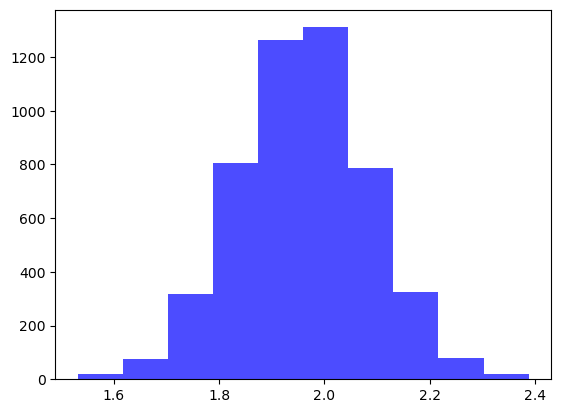

In [36]:
#Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
# Plot the histogram
plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]), color='blue', alpha=0.7)


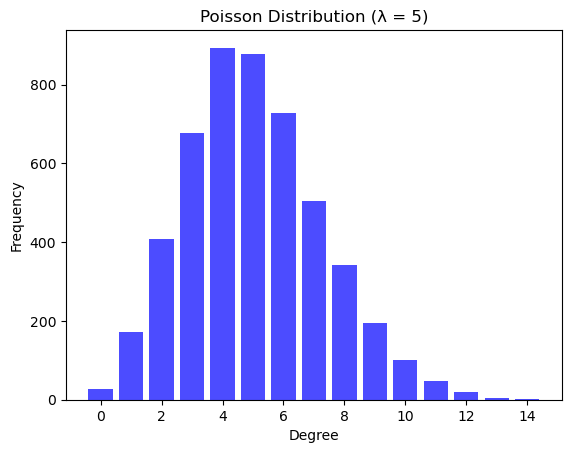

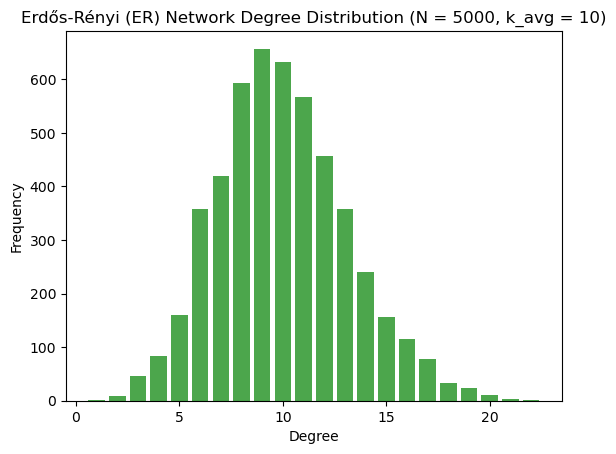

In [52]:
# Step 1: Generate Poisson-distributed data
lambda_value = 5  # λ for the Poisson distribution
data = np.random.poisson(lambda_value, 5000)

# Step 2: Plot the Poisson distribution using a bar chart
min_value = min(data)
max_value = max(data)
v = np.arange(min_value, max_value + 1)
hist, bin_edges = np.histogram(data, bins=v)

# Create the bar plot for Poisson distribution
plt.bar(bin_edges[:-1], hist, width=0.8, color='b', alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Poisson Distribution (λ = 5)')
plt.show()

# Step 3: Generate Erdős-Rényi (ER) network
N = 5000  # Number of nodes
k_avg = 10  # Desired average degree
p = k_avg / (N - 1)  # Find p using the relationship ⟨k⟩ = p(N-1)

# Create the ER graph using networkx
G = nx.erdos_renyi_graph(N, p)

# Step 4: Extract the degree distribution from the ER graph
degrees = [d for _, d in G.degree()]
min_degree = min(degrees)
max_degree = max(degrees)
v_er = np.arange(min_degree, max_degree + 1)
hist_er, bin_edges_er = np.histogram(degrees, bins=v_er)

# Step 5: Plot the degree distribution of the ER network using a bar chart
plt.bar(bin_edges_er[:-1], hist_er, width=0.8, color='g', alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Erdős-Rényi (ER) Network Degree Distribution (N = 5000, k_avg = 10)')
plt.show()

# Part 4 - Random network  

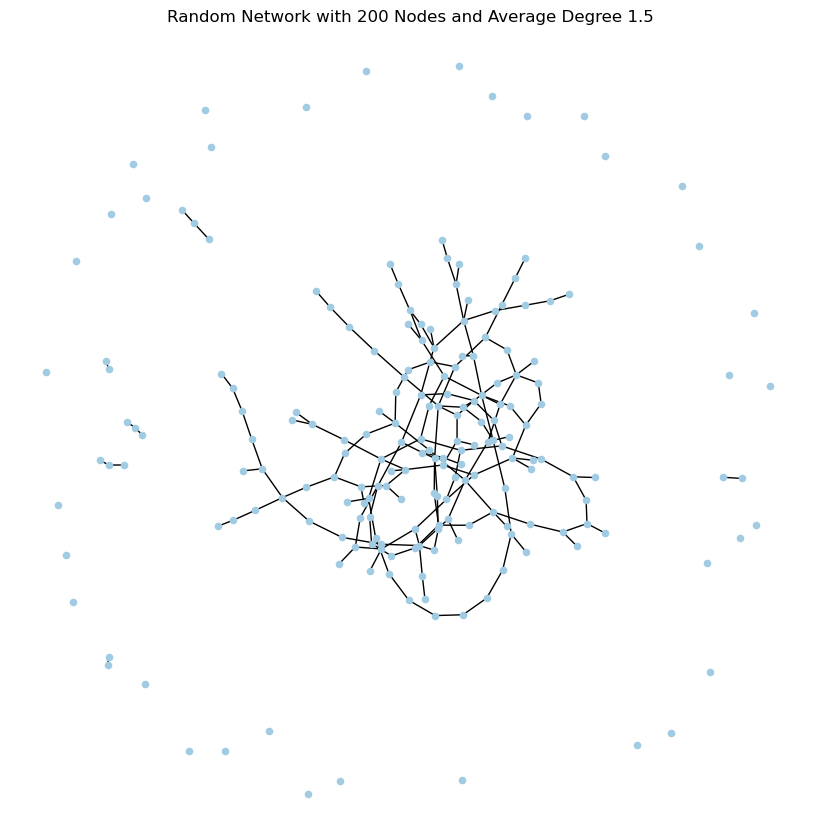

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
N = 200  # Number of nodes
k_avg = 1.5  # Average degree
p = k_avg / (N - 1)  # Calculate probability for Erdős-Rényi

# Generate an Erdős-Rényi random graph
G = nx.erdos_renyi_graph(N, p)

# Plot the network
plt.figure(figsize=(8, 8))
nx.draw(G, node_size=20, node_color="#A0CBE2")
plt.title("Random Network with 200 Nodes and Average Degree 1.5")
plt.show()

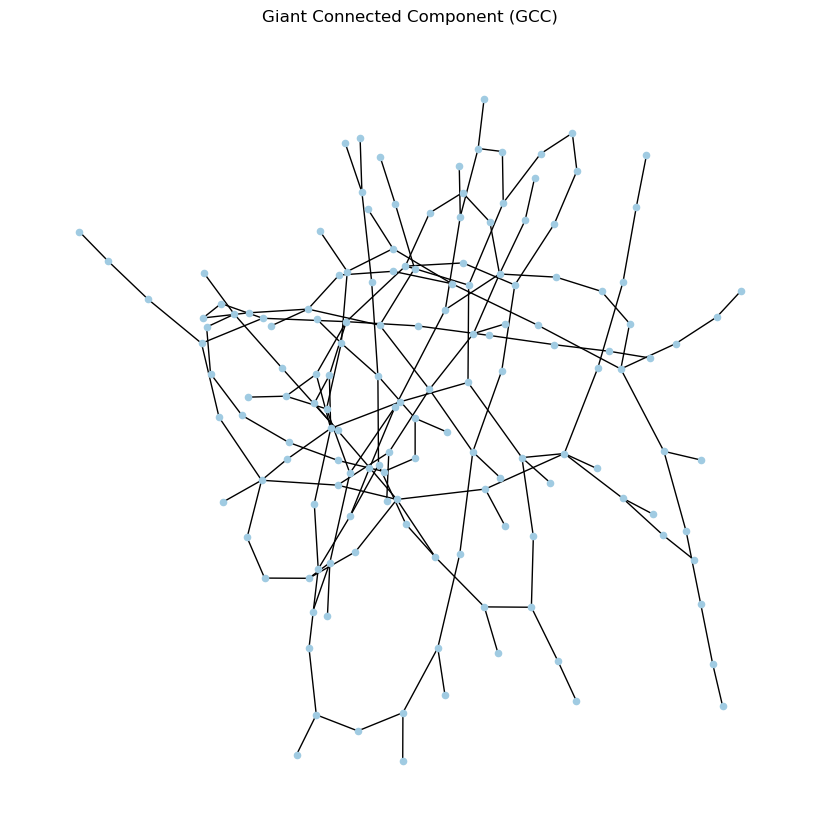

In [55]:
# Extract the Giant Connected Component (GCC)
gcc = max(nx.connected_components(G), key=len)
GCC = G.subgraph(gcc).copy()

# Plot the GCC
plt.figure(figsize=(8, 8))
nx.draw(GCC, node_size=20, node_color="#A0CBE2")
plt.title("Giant Connected Component (GCC)")
plt.show()


In [56]:
import random

# Choose a random node from the GCC
random_node = random.choice(list(GCC.nodes()))
print("Randomly selected node:", random_node)


Randomly selected node: 123


In [57]:
# Find all nodes that are 2 steps away from the randomly chosen node
shortest_paths = nx.single_source_shortest_path_length(GCC, random_node)
nodes_2_steps_away = [node for node, dist in shortest_paths.items() if dist == 2]
print("Nodes 2 steps away from node", random_node, ":", nodes_2_steps_away)


Nodes 2 steps away from node 123 : [32, 128]


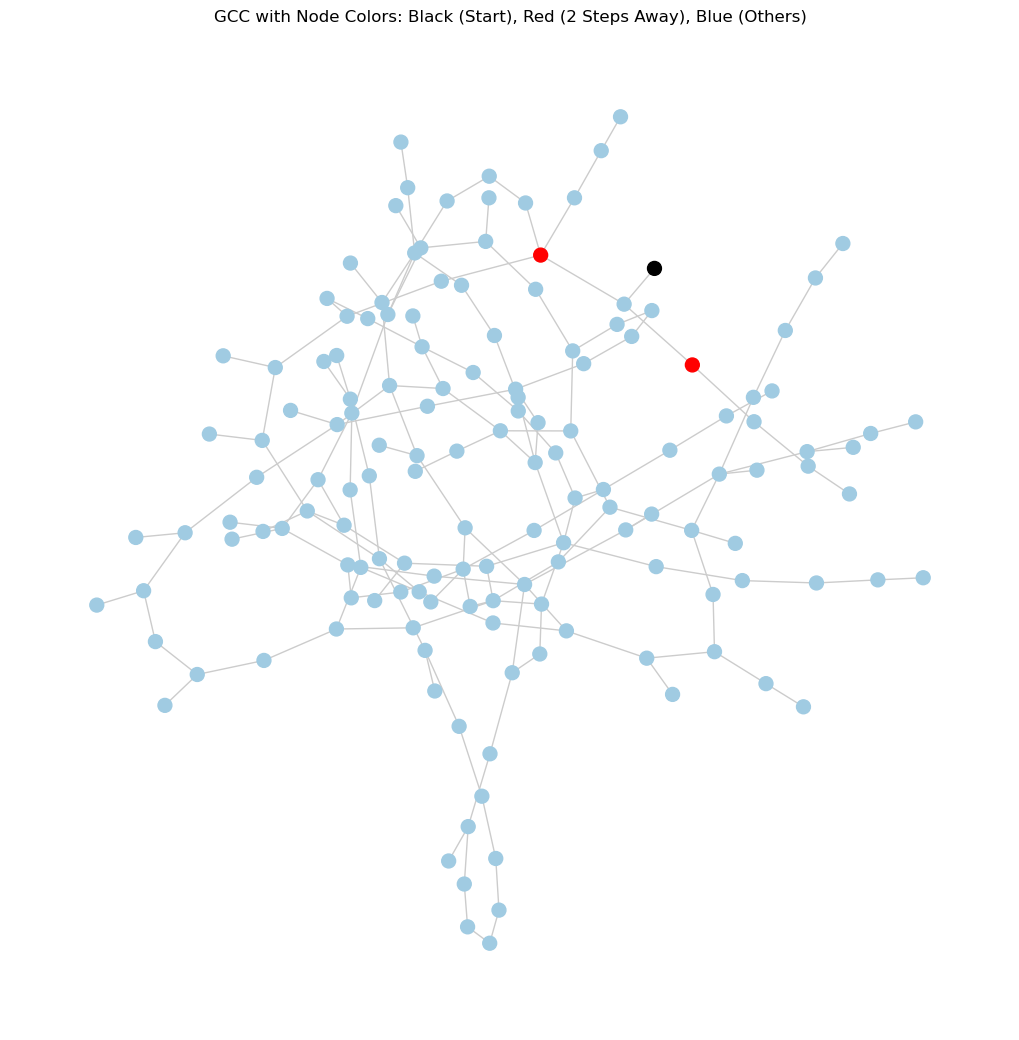

In [58]:
# Set node colors: black for the starting node, red for nodes 2 steps away, blue for all other nodes
node_colors = []
for node in GCC.nodes():
    if node == random_node:
        node_colors.append("#000000")  # black for the starting node
    elif node in nodes_2_steps_away:
        node_colors.append("#ff0000")  # red for nodes 2 steps away
    else:
        node_colors.append("#A0CBE2")  # blue for other nodes

# Plot the GCC with the color scheme
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(GCC)  # Spring layout for visualization
nx.draw(GCC, pos, node_color=node_colors, with_labels=False, node_size=100, edge_color="#CCCCCC")
plt.title("GCC with Node Colors: Black (Start), Red (2 Steps Away), Blue (Others)")
plt.show()
